### **Import Libraries**

In [1]:
!pip install tensorflow

In [2]:
!pip install --upgrade tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 28.6 MB/s eta 0:00:00
     ━━━━

In [3]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-federated 0.68.0 requires scipy~=1.9.3, but you have scipy 1.11.4 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

### **EDA**

In [ ]:
data = pd.read_csv("/content/winequality-white.csv",sep = ";")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.shape

(4898, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
for i in data.columns.values:
  print("Number of unique values in {} : {}".format(i,data[i].nunique()))

Number of unique values in fixed acidity : 68
Number of unique values in volatile acidity : 125
Number of unique values in citric acid : 87
Number of unique values in residual sugar : 310
Number of unique values in chlorides : 160
Number of unique values in free sulfur dioxide : 132
Number of unique values in total sulfur dioxide : 251
Number of unique values in density : 890
Number of unique values in pH : 103
Number of unique values in sulphates : 79
Number of unique values in alcohol : 103
Number of unique values in quality : 7


**Visualisation**

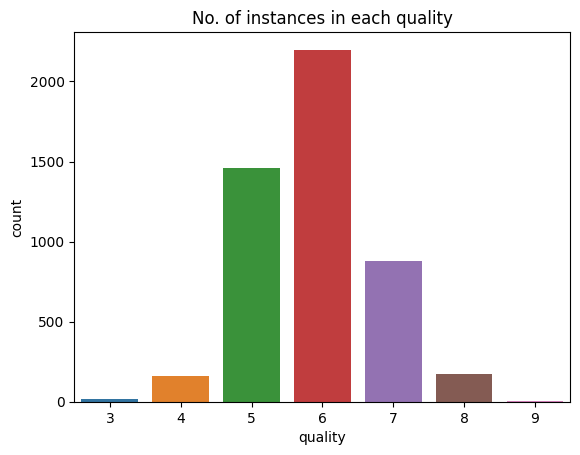

In [ ]:
sns.countplot(x='quality', data=data)
plt.title("No. of instances in each quality")
plt.show()

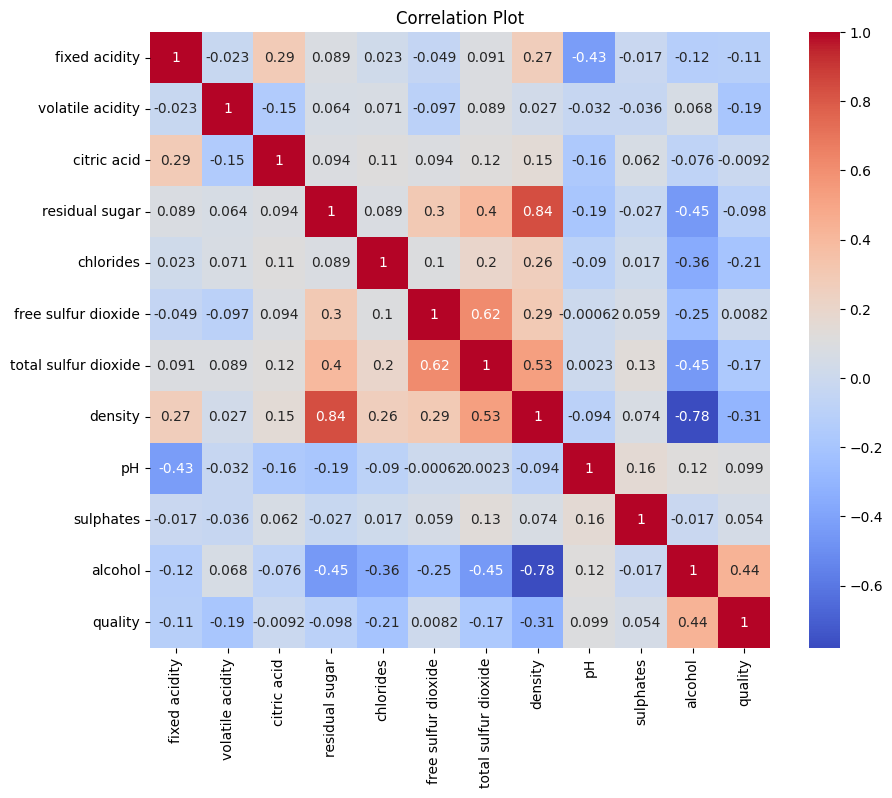

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

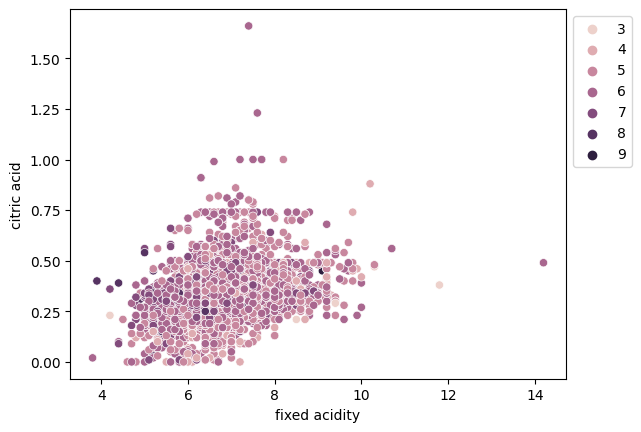

In [ ]:
sns.scatterplot(x='fixed acidity', y='citric acid',
				hue='quality', data=data )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

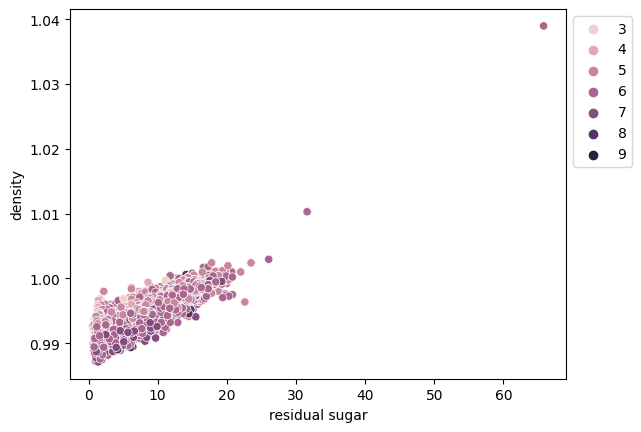

In [ ]:
sns.scatterplot(x='residual sugar',y='density',
				hue='quality', data=data )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

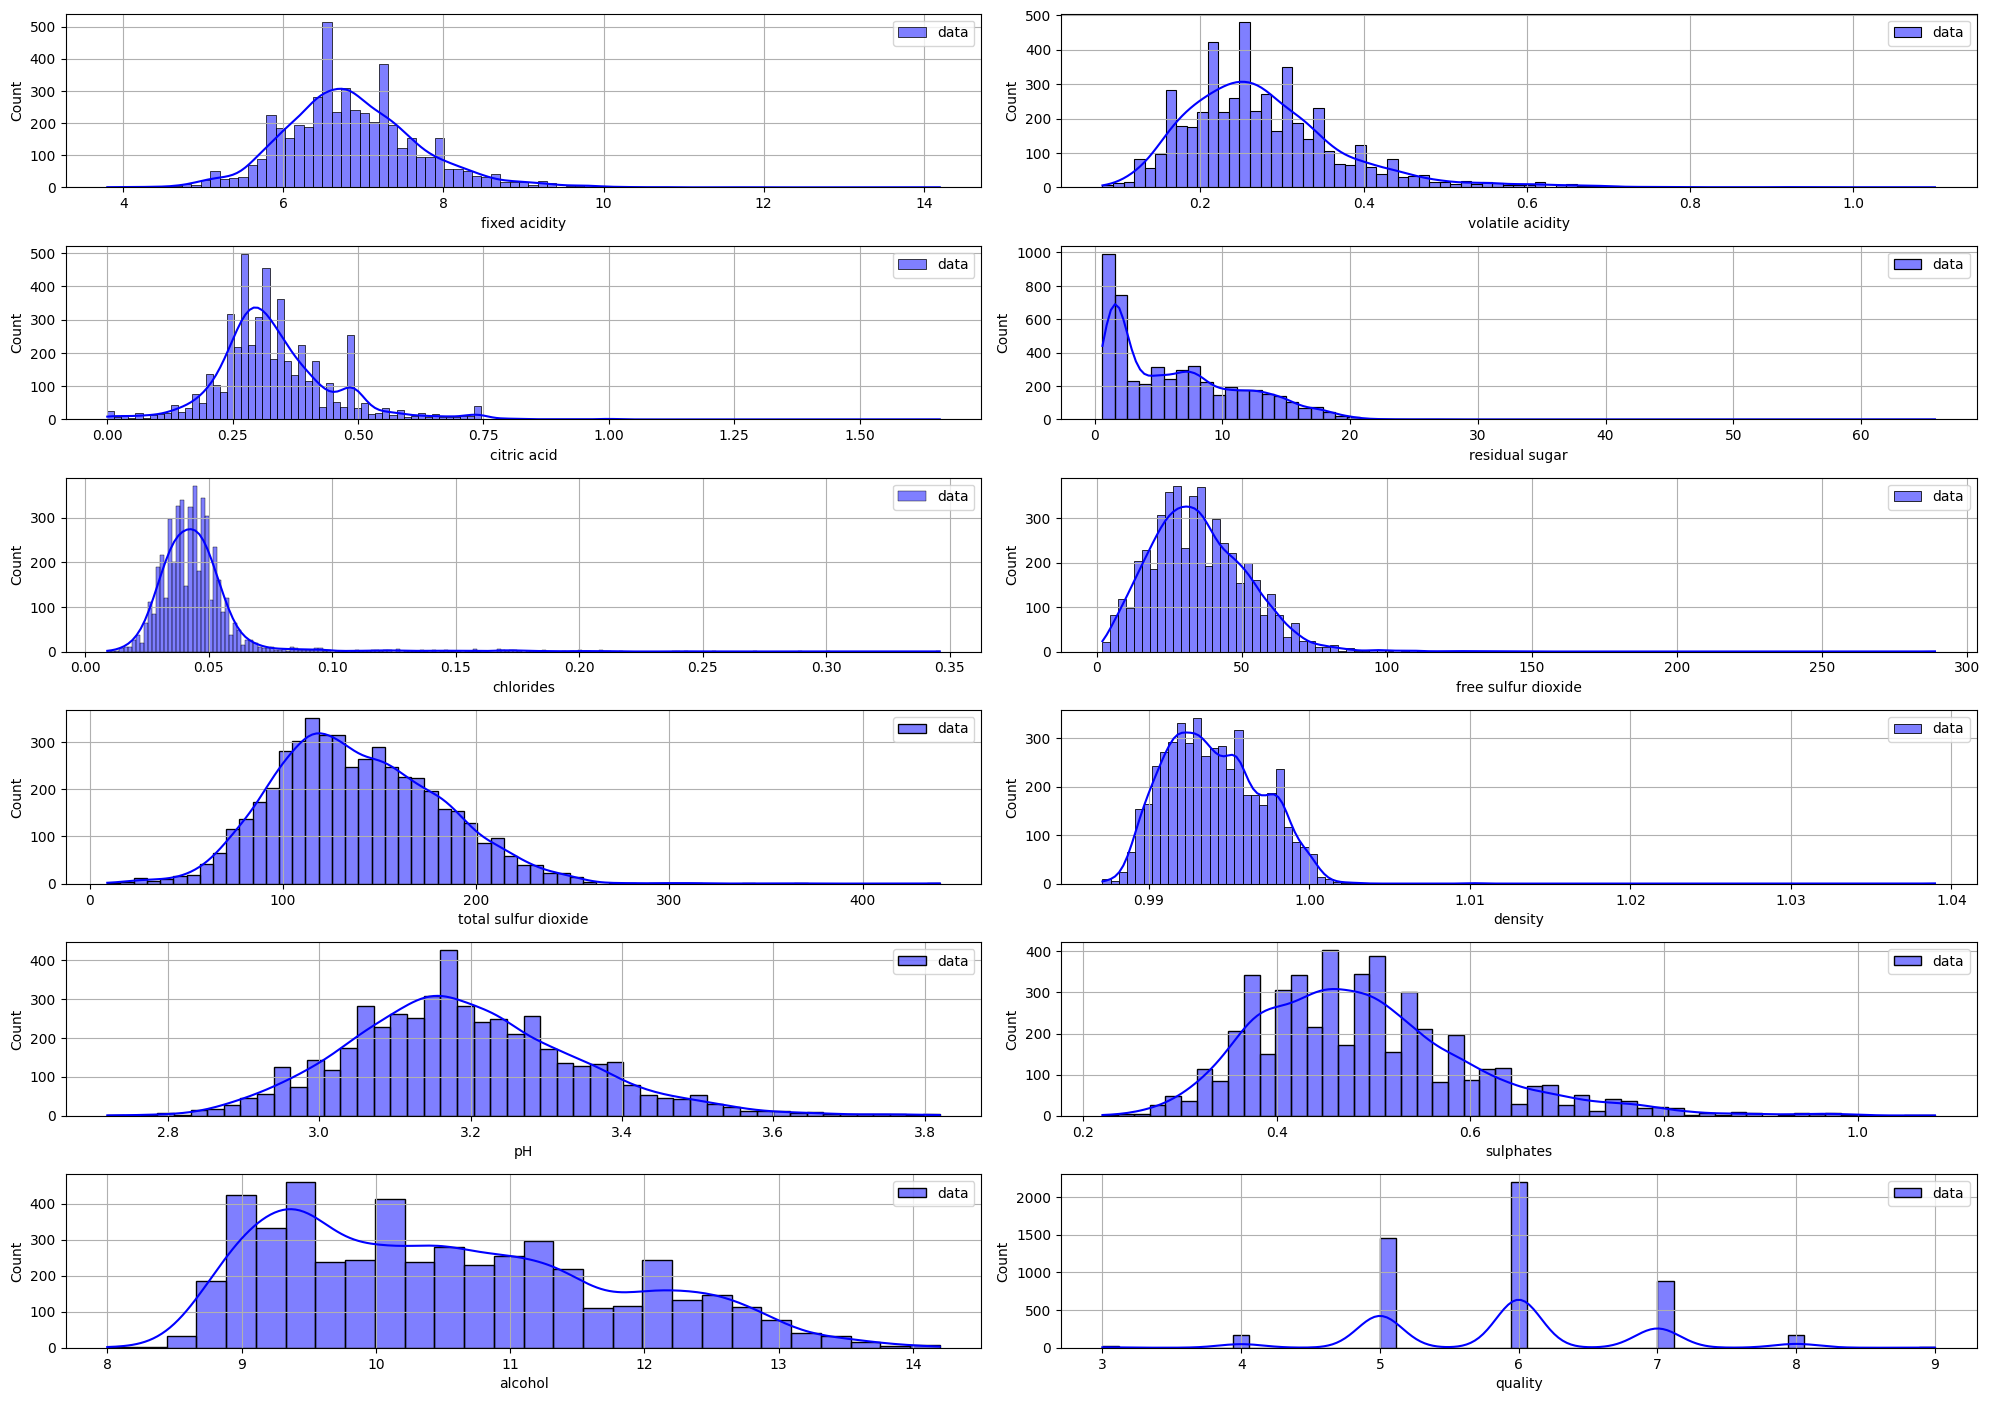

In [ ]:
#Histogram

plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
  plt.subplot(7,2,i+1)
  sns.histplot(data[col],color='b',kde = True,label='data')
  plt.grid()
  plt.legend(loc='upper right')
  plt.tight_layout()

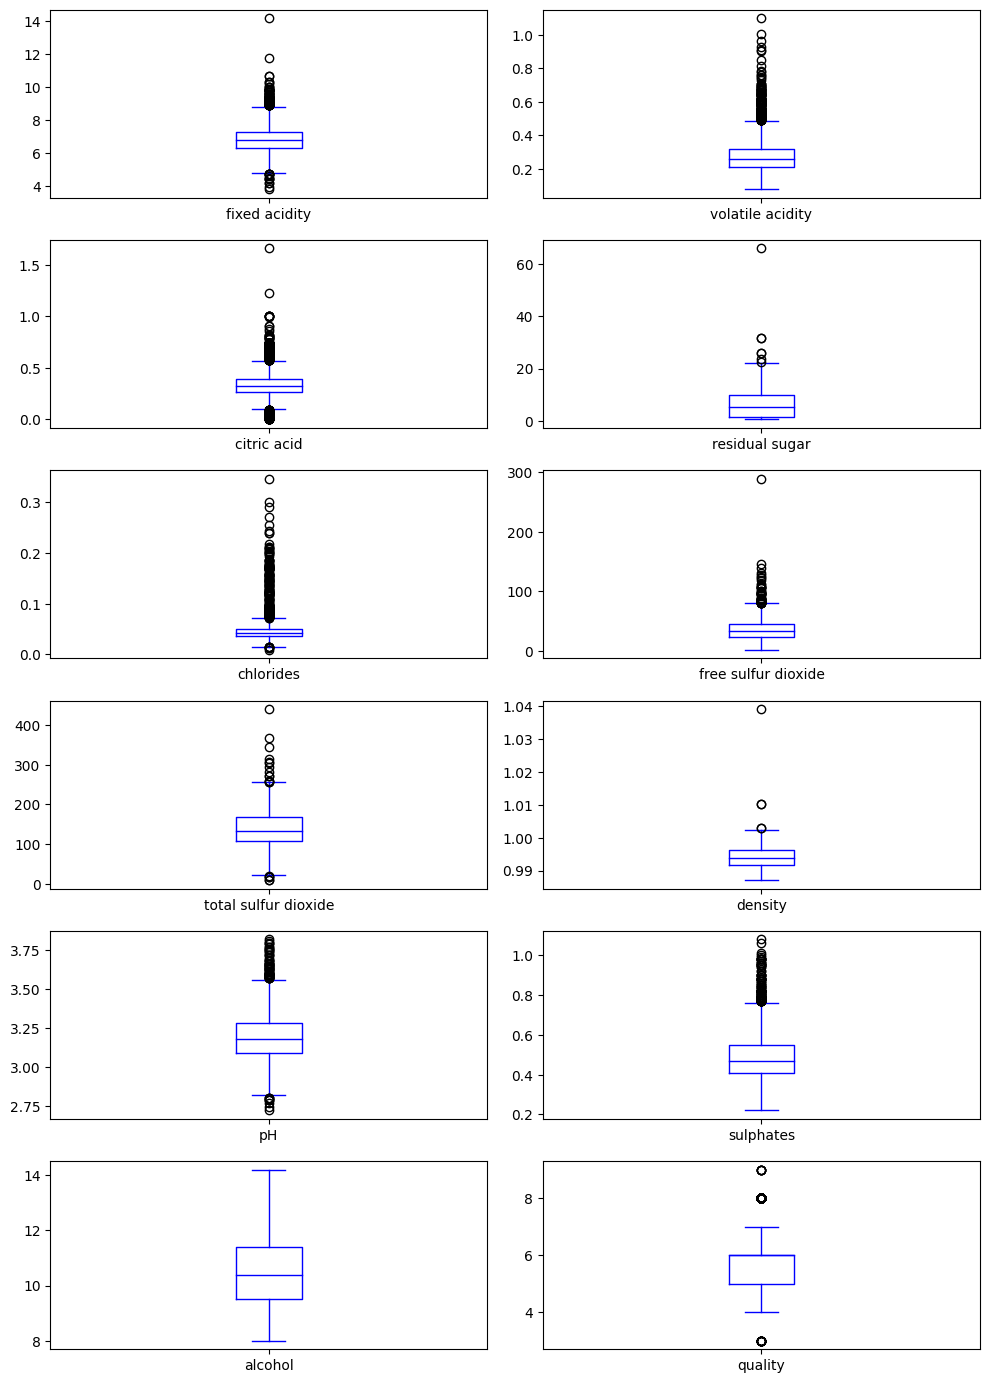

In [ ]:
#boxplot
plt.figure(figsize=(10,16))
for i,col in enumerate(list(data.columns.values)):
  plt.subplot(7,2,i+1)
  data.boxplot(col,color='b')
  plt.grid()
  plt.tight_layout()

In [ ]:
#Outlier removal
z_scores = np.abs(stats.zscore(data))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Remove outliers
# new DataFrame with outliers removed
df = data[(z_scores < threshold).all(axis=1)]

In [ ]:
df.shape

(4487, 12)

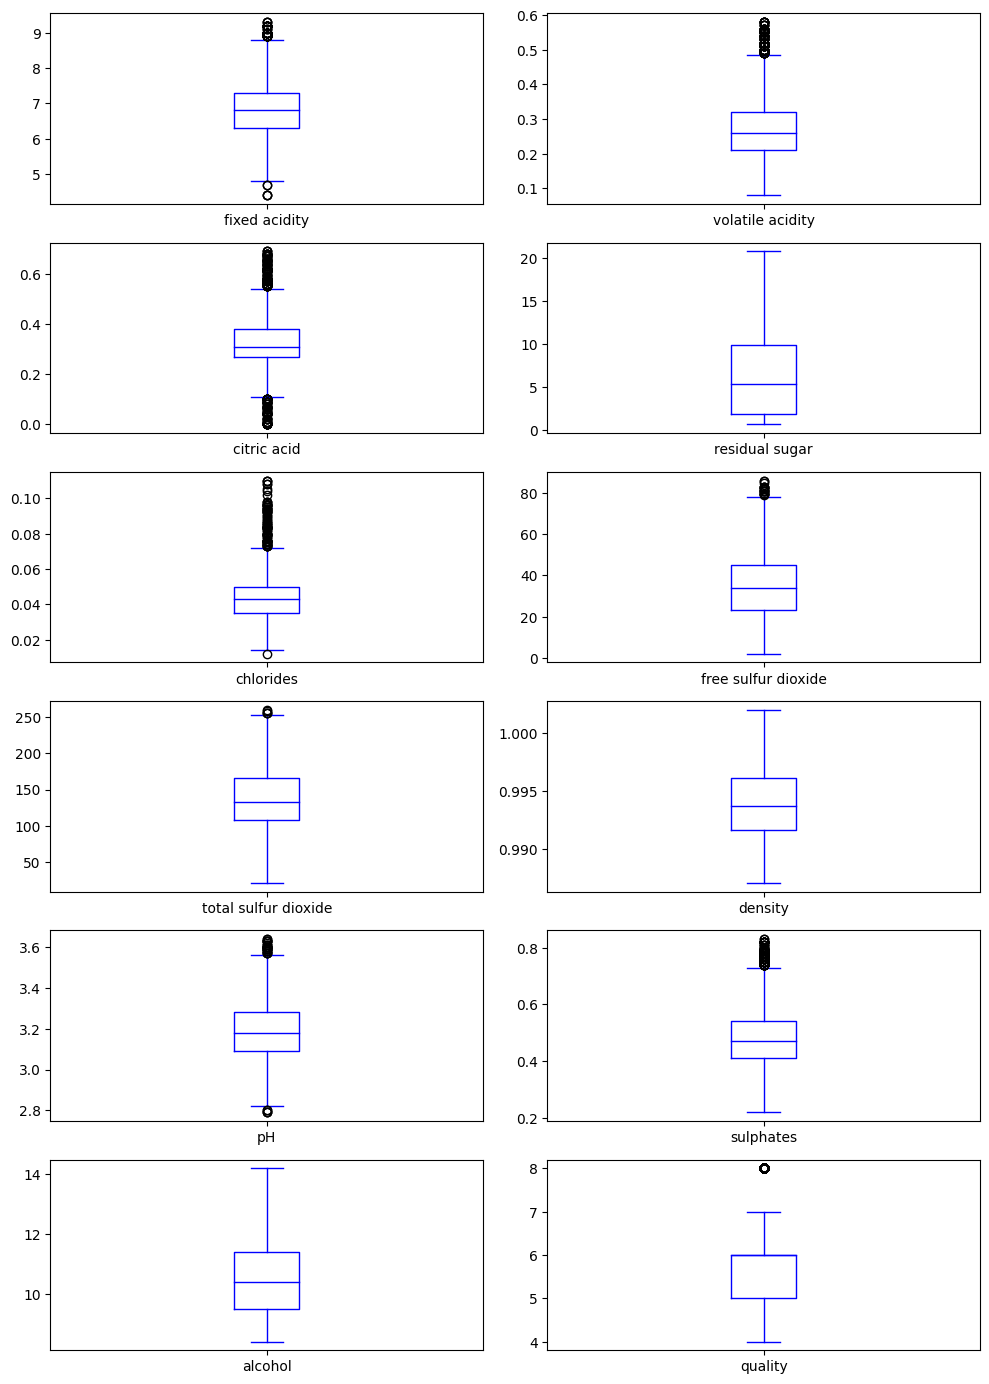

In [ ]:
plt.figure(figsize=(10,16))
for i,col in enumerate(list(df.columns.values)):
  plt.subplot(7,2,i+1)
  df.boxplot(col,color='b')
  plt.grid()
  plt.tight_layout()

### **LDA**

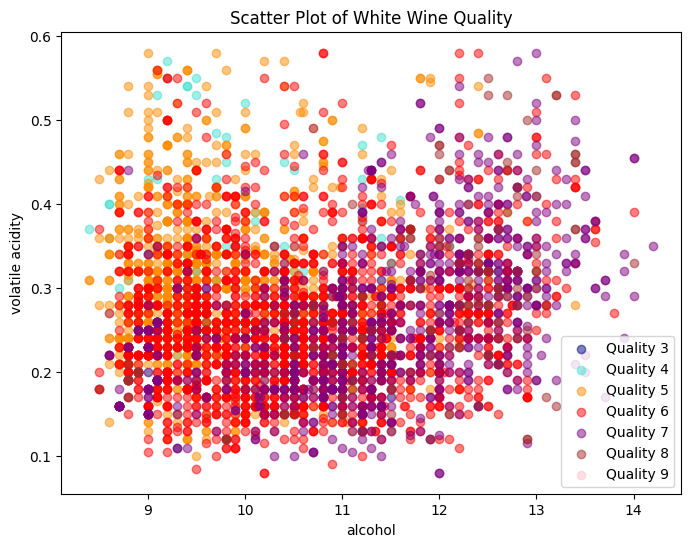

In [ ]:
data = df

# Define the features and target variable
X = data.drop(['quality'], axis=1)
y = data['quality']

# Create a scatter plot for a subset of features (you can choose specific features)
feature1 = 'alcohol'  # Replace with the name of your chosen feature
feature2 = 'volatile acidity'  # Replace with the name of another feature

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 3][feature1], X[y == 3][feature2], label='Quality 3', c='navy', alpha=0.5)
plt.scatter(X[y == 4][feature1], X[y == 4][feature2], label='Quality 4', c='turquoise', alpha=0.5)
plt.scatter(X[y == 5][feature1], X[y == 5][feature2], label='Quality 5', c='darkorange', alpha=0.5)
plt.scatter(X[y == 6][feature1], X[y == 6][feature2], label='Quality 6', c='red', alpha=0.5)
plt.scatter(X[y == 7][feature1], X[y == 7][feature2], label='Quality 7', c='purple', alpha=0.5)
plt.scatter(X[y == 8][feature1], X[y == 8][feature2], label='Quality 8', c='brown', alpha=0.5)
plt.scatter(X[y == 9][feature1], X[y == 9][feature2], label='Quality 9', c='pink', alpha=0.5)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.title('Scatter Plot of White Wine Quality')
plt.show()


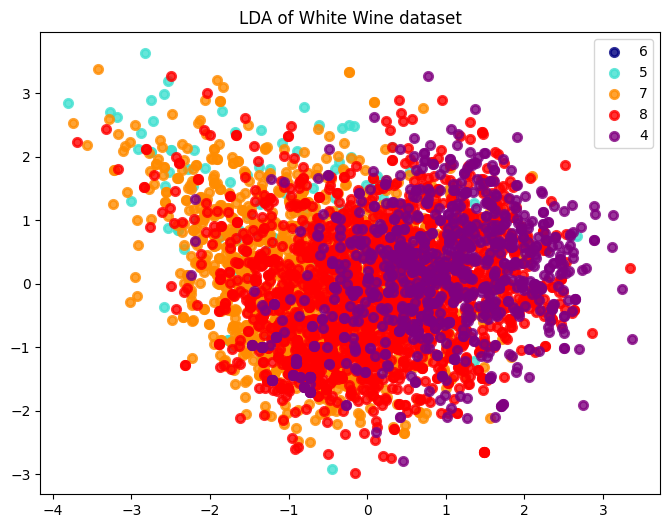

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = df

# Assuming "quality" is the target variable
X = data.drop(['quality'], axis=1)
y = data['quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Visualize the reduced data (if needed)
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'brown', 'pink']
lw = 2

for color, i, target_name in zip(colors, [3, 4, 5, 6, 7, 8, 9], data['quality'].unique()):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, color=color, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of White Wine dataset')
plt.show()


In [ ]:
num_features = data.shape[1] - 1
num_features

11

In [ ]:
num_features = X_lda.shape[1] - 1
num_features

1

In [ ]:
X_lda

array([[-1.00245264, -1.42000315],
       [-1.85699027,  0.91401709],
       [-0.27284942,  0.96766782],
       ...,
       [-1.46912919, -0.18667008],
       [ 1.81108824,  0.73950076],
       [ 1.31545791,  0.14682743]])

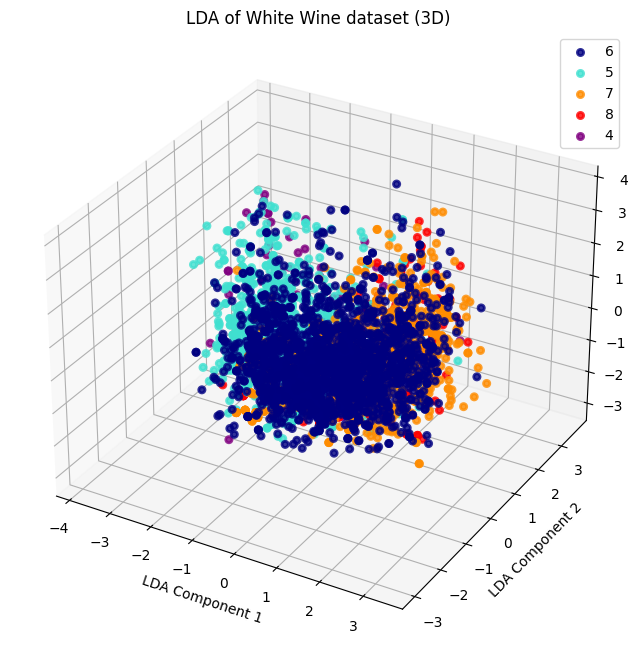

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = df

# Assuming "quality" is the target variable
X = data.drop(['quality'], axis=1)
y = data['quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA for dimensionality reduction with 3 components
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X_scaled, y)

# Create a 3D plot of the reduced data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'brown', 'pink']
lw = 2

for color, i, target_name in zip(colors, data['quality'].unique(), data['quality'].unique()):
    ax.scatter(X_lda[y == i, 0], X_lda[y == i, 1], X_lda[y == i, 2], alpha=0.8, color=color, lw=lw,
                label=target_name)

ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('LDA of White Wine dataset (3D)')
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Define the parameter grid for grid search
param_grid = {'n_components': [1, 2, 3, 4, 5]}

# Define your classifier (e.g., a Support Vector Machine)
clf = LinearDiscriminantAnalysis()

# Create a GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')

# Fit the grid search to your data
grid_search.fit(X, y)

# Get the best estimator and best parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X)

# Calculate the F1 score on the entire dataset (or a validation set)
f1 = f1_score(y, y_pred,average = None)

# Print the best parameters and F1 score
print("Best Parameters:", best_params)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

Best Parameters: {'n_components': 1}
F1 Score: [0.14864865 0.54846727 0.61658778 0.38649425 0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 608, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_se

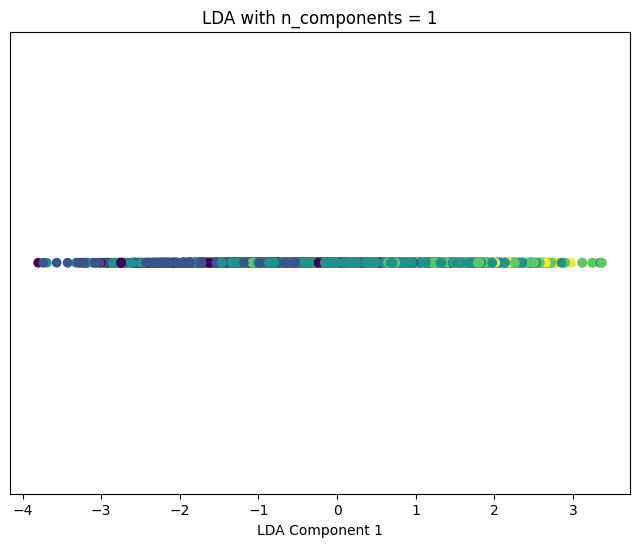

In [ ]:
# Apply LDA with n_components = 1
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# Create a scatter plot to visualize the data in 1D
plt.figure(figsize=(8, 6))
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis')
plt.yticks([])
plt.xlabel('LDA Component 1')
plt.title('LDA with n_components = 1')
plt.show()

### **Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulated time series data for multiple clients
num_clients = 10
client_data = {}
labels = {}  # Define labels for each client

# For multi-class classification (e.g., labels 3 to 9)
for i in range(num_clients):
    client_data[i] = df.sample(n=150, replace=True)
    labels[i] = np.random.choice(range(3, 10), size=150)  # Define labels from 3 to 9


# Define a function for local LDA model training and classification
def train_local_lda(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    if len(X_train) == 0:
        print(f"Client {i} has insufficient data for training.")
        return None, None

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    y_pred = lda.predict(X_test)
    return lda, y_pred

local_models = {}
local_predictions = {}

# Train LDA models and make local predictions for each client
for client_id in range(num_clients):
    local_models[client_id], local_predictions[client_id] = train_local_lda(client_data[client_id], labels[client_id])

In [ ]:
for key, values in local_predictions.items():
    print(f"""client {key} :-

Predictions {values}\n""")

client 0 :- 
    
Predictions [3 8 8 4 8 8 8 8 4 6 5 8 6 8 5 6 6 5 5 7 8 8 5 8 4 4 4 6 9 7]

client 1 :- 
    
Predictions [6 8 4 3 5 4 6 4 4 3 4 8 5 4 9 8 4 8 4 4 8 4 7 5 3 4 3 3 9 8]

client 2 :- 
    
Predictions [3 8 5 9 8 7 8 9 6 5 9 6 7 9 5 3 5 8 7 3 3 5 9 4 4 9 5 9 7 3]

client 3 :- 
    
Predictions [3 3 8 8 6 6 9 7 4 7 8 3 3 6 7 7 6 8 5 8 9 6 6 4 3 6 5 8 4 8]

client 4 :- 
    
Predictions [5 7 8 6 7 4 5 9 7 7 7 5 3 8 7 4 7 9 9 8 9 9 5 6 9 4 4 4 6 6]

client 5 :- 
    
Predictions [5 3 7 6 9 6 3 7 6 8 3 3 4 7 5 7 8 8 7 6 9 6 8 8 3 5 7 6 7 6]

client 6 :- 
    
Predictions [7 9 8 9 9 4 5 6 7 5 8 8 4 3 8 5 8 6 6 4 5 4 8 5 7 7 7 5 4 7]

client 7 :- 
    
Predictions [3 9 9 9 5 3 6 8 9 4 3 5 9 5 3 4 5 5 6 3 9 3 4 4 3 5 3 3 3 3]

client 8 :- 
    
Predictions [5 6 4 3 7 4 6 8 5 4 9 4 6 8 7 6 8 6 9 5 4 7 8 3 7 6 9 5 8 3]

client 9 :- 
    
Predictions [6 6 8 7 6 7 5 9 3 3 5 9 4 5 5 8 5 7 5 6 9 4 8 4 9 6 5 7 4 7]



In [ ]:
from collections import Counter
from statistics import mode

# Flatten the local predictions into a single list
flattened_predictions = [prediction for predictions_list in local_predictions.values() for prediction in predictions_list]

# Determine the majority-voted class label for multi-class classification
majority_vote = mode(flattened_predictions)

print("Global Model Prediction:")
print(majority_vote)

Global Model Prediction:
8


In [ ]:
from sklearn.metrics import accuracy_score

# True labels for the global dataset (assuming you have a separate set of true labels)
true_labels = np.random.choice(range(3, 10), size=len(flattened_predictions))  # Replace with your actual true labels

# Calculate the accuracy score
accuracy = accuracy_score(true_labels, flattened_predictions)

print(f"Global Model Accuracy: {accuracy}")

Global Model Accuracy: 0.14333333333333334


### **Streamlit**

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 126.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.907s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [5]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from collections import Counter
from statistics import mode

st.set_page_config(page_title='ML Final Lab', layout="wide")

st.title("Wine Quality Classification App")

#sidebar
st.sidebar.image("https://cdn.shopify.com/s/files/1/1568/8443/products/y90_es_nhy_layout_1_square_red-and-white-wine-splash-wall-art.webp?v=1669116884")
st.sidebar.write('Developed by ')
st.sidebar.write('V K Deeksha - 21PD37')
st.sidebar.write('M Aiswarya - 21PD20')

# Create tabs
tab1, tab2, tab3, tab4, tab5 = st.tabs(["Overview", "🗃 Data","📈 Visualize","LDA","Model"])

with tab1:
   st.header("Overview")
   st.markdown("This project explains the work of Linear Discriminant Analysis (LDA) using the help of White-wine quality dataset.")
   # Introduction to LDA
   st.subheader("Linear Discriminant Analysis(LDA):")
   st.markdown("Linear Discriminant Analysis (LDA) is one of the commonly used dimensionality reduction techniques in machine learning to solve more than two-class classification problems. It is also known as Normal Discriminant Analysis (NDA) or Discriminant Function Analysis (DFA).It aims to find a linear combination of features that best separates different classes while preserving class-specific information.")
   # Provide a link to learn more about LDA
   st.markdown("[Learn more about LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)")
   # Introduction to federated learning
   st.subheader("Federated learning:")
   long_txt = """Federated learning is a way to train AI models without anyone seeing or touching your data, offering a way to unlock information to feed new AI applications.
                  Under federated learning, multiple people remotely share their data to collaboratively train a single deep learning model, improving on it iteratively, like a team presentation or report.
                  Each party downloads the model from a datacenter in the cloud, usually a pre-trained foundation model.
                  They train it on their private data, then summarize and encrypt the models new configuration.
                  The model updates are sent back to the servers, decrypted, averaged, and integrated into the centralized model.
                  Iteration after iteration, the collaborative training continues until the model is fully trained."""
   st.markdown(long_txt)
   # Provide a link to learn more about FL
   st.markdown("[Learn more about Federated learning](https://research.ibm.com/blog/what-is-federated-learning)")

with tab2:
   st.header("White-wine Quality classification Dataset")
   st.markdown("The White-wine dataset has seven classes(Quality): 3,4,5,6,7,8,9.")
   long_txt = """
                1. Title: Wine Quality.

                2. Sources Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009.

                3. Number of Instances: white wine - 4898.

                4. Number of Attributes: 11 + output attribute.

                5. Attribute information:

                      Input variables (based on physicochemical tests):

                        1 - fixed acidity

                        2 - volatile acidity

                        3 - citric acid

                        4 - residual sugar

                        5 - chlorides

                        6 - free sulfur dioxide

                        7 - total sulfur dioxide

                        8 - density

                        9 - pH

                        10 - sulphates

                        11 - alcohol

                        Output variable (based on sensory data):
                        12 - quality (score between 0 and 10)

                6. Missing Attribute Values: None."""
   st.markdown(long_txt)
   st.subheader("Data:")
   st.markdown("[Download dataset here.](https://archive.ics.uci.edu/dataset/186/wine+quality)")
   # Load the white wine dataset
   data = pd.read_csv('/content/winequality-white.csv', sep=';')
   st.write(data)

with tab3:
   st.header("Visualization")

   # Create a count plot using Seaborn
   st.subheader("Count Plot of Wine Quality:")
   # Add a description of the count plot
   st.write("The count plot shows the distribution of wine quality in the white wine dataset.")
   plt.figure(figsize=(8, 6))
   sns.set_style("whitegrid")
   sns.countplot(data=data, x='quality', palette='viridis')
   plt.xlabel("Quality")
   plt.ylabel("Count")
   st.pyplot(plt)

   # Create a correlation matrix
   correlation_matrix = data.corr()
   # Create a correlation heatmap using Seaborn
   st.subheader("Correlation Heatmap:")
   # Add a description of the correlation heatmap
   st.write("The correlation heatmap shows the relationships between different features in the white wine dataset.")
   plt.figure(figsize=(10, 8))
   sns.set_style("whitegrid")
   sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
   st.pyplot(plt)

   #Scatter Plot: Select two features for the scatter plot
   st.subheader("Scatter Plot:")
   feature1 = st.selectbox('Select the first feature:', data.columns)
   feature2 = st.selectbox('Select the second feature:', data.columns)
   # Add a description of the scatter plot
   st.write(f"The scatter plot shows the relationship between {feature1} and {feature2} in the white wine dataset.")
   plt.figure(figsize=(8, 6))
   sns.set_style("whitegrid")
   sns.scatterplot(x=feature1, y=feature2,hue='quality', data=data )
   plt.xlabel(feature1)
   plt.ylabel(feature2)
   st.pyplot(plt)

   # Display histograms with KDE for all features
   st.subheader("Histograms:")
   st.write("This Streamlit app displays histograms with kernel density estimation (KDE) for selected feature in the white wine dataset.")
   # Select a feature using a selectbox
   selected_feature = st.selectbox("Select a feature:", data.columns)
   plt.figure(figsize=(8, 6))
   sns.set_style("whitegrid")
   sns.histplot(data=data, x=selected_feature, kde=True, color='blue', bins=30)
   plt.xlabel(selected_feature)
   plt.ylabel("Frequency")
   st.pyplot(plt)

   def box_plot(data):
    # Set the number of columns in the box plot grid
    num_columns = 2
    num_features = len(data.columns) - 1  # Exclude 'quality' column
    num_rows = (num_features - 1) // num_columns + 1
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4*num_rows))
    for i, feature in enumerate(data.columns):
        if feature != 'quality':
            row = i // num_columns
            col = i % num_columns
            ax = axes[row, col]
            sns.set_style("whitegrid")
            sns.boxplot(data=data, x=feature, ax=ax, color='blue')
            ax.set_xlabel("")  # Clear the x-axis label
            ax.set_title(feature, fontsize=10)
    # Remove any remaining empty subplots
    for i in range(num_features, num_rows * num_columns):
        fig.delaxes(axes.flatten()[i])
    st.pyplot(fig)

   # Display box plots for all features
   st.subheader("Box Plots:")
   st.write("This Streamlit app displays box plots for all features in the white wine dataset before the outliers removal.")
   box_plot(data)
   st.write("This Streamlit app displays box plots for all features in the white wine dataset after the outliers removal using z-score moethod.")
   #Outlier removal
   z_scores = np.abs(stats.zscore(data))
   threshold = 3
   outlier_indices = np.where(z_scores > threshold)
   # Remove outliers
   # new DataFrame with outliers removed
   df = data[(z_scores < threshold).all(axis=1)]
   box_plot(df)

with tab4:
   st.header("LDA Dimensionality Reduction on White Wine Dataset")
   st.write("This Streamlit app performs Linear Discriminant Analysis (LDA) for dimensionality reduction on the white wine dataset.")

   # Separate features and target
   X = df.drop("quality", axis=1)
   y = df["quality"]

   # Standardize the features (important for LDA)
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)

   # Apply LDA for dimensionality reduction
   lda = LinearDiscriminantAnalysis(n_components=2)
   X_lda = lda.fit_transform(X_scaled, y)

   # Create a DataFrame with the reduced data
   reduced_data = pd.DataFrame(data=X_lda, columns=["LDA Component 1", "LDA Component 2"])
   reduced_data["Quality"] = y  # Add quality labels to the reduced data

   # Create a scatter plot of the reduced data
   st.subheader("LDA Reduced Data Scatter Plot")
   st.write("Visualization after reducing the data into 2-D")
   plt.figure(figsize=(8, 6))
   sns.set_style("whitegrid")
   sns.scatterplot(data=reduced_data, x="LDA Component 1", y="LDA Component 2", hue="Quality", palette='viridis')
   plt.xlabel("LDA Component 1")
   plt.ylabel("LDA Component 2")
   plt.title("LDA Reduced Data Scatter Plot")
   st.pyplot(plt)

   # Apply LDA for dimensionality reduction to 3D
   lda = LinearDiscriminantAnalysis(n_components=3)
   X_lda = lda.fit_transform(X_scaled, y)

   # Create a 3D scatter plot of the reduced data
   st.write("Visualization after reducing the data into 3-D")
   fig = plt.figure(figsize=(8, 6))
   ax = fig.add_subplot(111, projection='3d')
   ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap='viridis', label='Quality')
   ax.set_xlabel("LDA Component 1")
   ax.set_ylabel("LDA Component 2")
   ax.set_zlabel("LDA Component 3")
   ax.set_title("LDA Reduced Data 3D Scatter Plot")
   st.pyplot(fig)

with tab5:
   st.header("Model")
   st.subheader("Model using fedarated learning:")
   st.markdown("Data:")
   st.write(df)

   # Simulated time series data for multiple clients
   num_clients = st.number_input("Enter number of clients:", min_value=0, max_value=120)
   st.write(f"You entered: {num_clients}")
   # num_clients = 10
   client_data = {}
   labels = {}  # Define labels for each client

   # For multi-class classification (e.g., labels 3 to 9)
   for i in range(num_clients):
       client_data[i] = df.sample(n=150, replace=True)
       labels[i] = np.random.choice(range(3, 10), size=150)  # Define labels from 3 to 9

   # Define a function for local LDA model training and classification
   def train_local_lda(data, labels):
       X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
       if len(X_train) == 0:
           print(f"Client {i} has insufficient data for training.")
           return None, None

       lda = LinearDiscriminantAnalysis()
       lda.fit(X_train, y_train)

       y_pred = lda.predict(X_test)
       return lda, y_pred

   local_models = {}
   local_predictions = {}

   # Train LDA models and make local predictions for each client
   for client_id in range(num_clients):
        local_models[client_id], local_predictions[client_id] = train_local_lda(client_data[client_id], labels[client_id])

   # Displaying local predictions
   st.subheader("Local predictions for each client model:")
   # Create two lists to hold the keys and values
   keys = list(local_predictions.keys())
   values = list(local_predictions.values())
   # Create a DataFrame to display in a table
   dt = {'Clients': keys, 'Predictions': values}
   if dt:
      d = pd.DataFrame(dt)
      # Display the DataFrame as a table in Streamlit
      st.write(d)
   else:
      st.write("The dictionary is empty.")

   # Flatten the local predictions into a single list
   flattened_predictions = [prediction for predictions_list in local_predictions.values() for prediction in predictions_list]

   # Determine the majority-voted class label for multi-class classification
   majority_vote = mode(flattened_predictions)
   st.subheader("Global Model Prediction:")
   st.write("Prediction:",majority_vote)

   # True labels for the global dataset (assuming you have a separate set of true labels)
   true_labels = np.random.choice(range(3, 10), size=len(flattened_predictions))  # Replace with your actual true labels
   # Calculate the accuracy score
   accuracy = accuracy_score(true_labels, flattened_predictions)
   st.write(f"Global Model Accuracy: {accuracy}")


Writing app.py


In [6]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.172.240.66


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.981s
your url is: https://tangy-bats-look.loca.lt
